### Van Genuch equation to estimate soil water release curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from ideotype.data_process import read_sims, read_data, parse_mature
from ideotype import DATA_PATH

In [7]:
def vangenuch(thr, ths, alpha, n):
    """
    Van Genuch equation to estimate water retention curve.
    
    Parameters
    ----------
    thr : 
    ths : 
    alpha :
    n :

    returns
    -------
    hs
    ys

    """
    m = -(1-1/n)
    hs = np.arange(1,15000)  # matric potential (kPa)
    y0s = [((1 + alpha*h)**n)**m for h in hs]
    ys = [(ths-thr)*y0 + thr for y0 in y0s]  # soil water content (cm3/cm3)
    
    return(hs, ys)

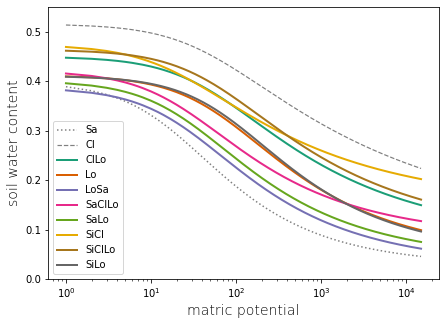

In [8]:
# setup
hs_sa, ys_sa = vangenuch(0.027, 0.398, 0.05610, 1.44361)
hs_cl, ys_cl = vangenuch(0.099, 0.516, 0.02436, 1.2045)

hs_cllo, ys_cllo = vangenuch(0.077, 0.45, 0.02147, 1.28374)
hs_lo, ys_lo = vangenuch(0.047, 0.412, 0.01567, 1.35713)
hs_losa, ys_losa = vangenuch(0.027, 0.387, 0.04095, 1.36571)
hs_sacllo, ys_sacllo = vangenuch(0.083, 0.421, 0.04506, 1.35181)
hs_salo, ys_salo = vangenuch(0.038, 0.401, 0.03878, 1.35869)
hs_sicl, ys_sicl = vangenuch(0.147, 0.474, 0.05272, 1.26669)
hs_sicllo, ys_sicllo = vangenuch(0.084, 0.464, 0.01932, 1.2821)
hs_silo, ys_silo = vangenuch(0.047, 0.411, 0.01252, 1.38227)

# visualize
fig = plt.figure(figsize=(7,5))
ax = plt.gca()

ax.plot(hs_sa, ys_sa, c='grey', label='Sa', linestyle=':')
ax.plot(hs_cl, ys_cl, c='grey', label='Cl', linestyle='--', linewidth=1.2)

ax.plot(hs_cllo, ys_cllo, c='#1b9e77', label='ClLo', linewidth=2)
ax.plot(hs_lo, ys_lo, c='#d95f02', label='Lo', linewidth=2)
ax.plot(hs_losa, ys_losa, c='#7570b3', label='LoSa', linewidth=2)
ax.plot(hs_sacllo, ys_sacllo, c='#e7298a', label='SaClLo', linewidth=2)
ax.plot(hs_salo, ys_salo, c='#66a61e', label='SaLo', linewidth=2)
ax.plot(hs_sicl, ys_sicl, c='#e6ab02', label='SiCl', linewidth=2)
ax.plot(hs_sicllo, ys_sicllo, c='#a6761d', label='SiClLo', linewidth=2)
ax.plot(hs_silo, ys_silo, c='#666666', label='SiLo', linewidth=2)

ax.set_xscale('log')
ax.set_xlabel('matric potential', size=14, fontweight='light')
ax.set_ylabel('soil water content', size=14, fontweight='light')
ax.set_ylim(0,0.55)
ax.legend()

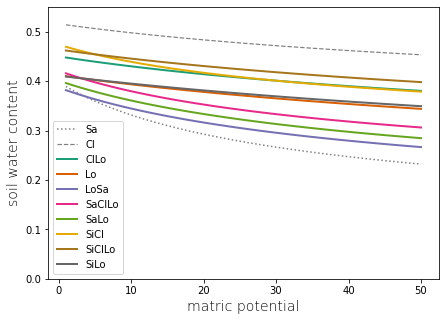

In [9]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()

ax.plot(hs_sa[:50], ys_sa[:50], c='grey', label='Sa', linestyle=':')
ax.plot(hs_cl[:50], ys_cl[:50], c='grey', label='Cl', linestyle='--', linewidth=1.2)

ax.plot(hs_cllo[:50], ys_cllo[:50], c='#1b9e77', label='ClLo', linewidth=2)
ax.plot(hs_lo[:50], ys_lo[:50], c='#d95f02', label='Lo', linewidth=2)
ax.plot(hs_losa[:50], ys_losa[:50], c='#7570b3', label='LoSa', linewidth=2)
ax.plot(hs_sacllo[:50], ys_sacllo[:50], c='#e7298a', label='SaClLo', linewidth=2)
ax.plot(hs_salo[:50], ys_salo[:50], c='#66a61e', label='SaLo', linewidth=2)
ax.plot(hs_sicl[:50], ys_sicl[:50], c='#e6ab02', label='SiCl', linewidth=2)
ax.plot(hs_sicllo[:50], ys_sicllo[:50], c='#a6761d', label='SiClLo', linewidth=2)
ax.plot(hs_silo[:50], ys_silo[:50], c='#666666', label='SiLo', linewidth=2)

ax.set_xlabel('matric potential', size=14, fontweight='light')
ax.set_ylabel('soil water content', size=14, fontweight='light')
ax.set_ylim(0,0.55)
ax.legend()

In [10]:
num = 50

dict_m = {#'Sa': [round(ys_sa[num]-ys_sa[0]/hs_sa[num]-hs_sa[0],2)],
          #'Cl': [round(ys_cl[num]-ys_cl[0]/hs_cl[num]-hs_cl[0],2)],
          'SiCl': [round(ys_sicl[num]-ys_sicl[0]/hs_sicl[num]-hs_sicl[0],2)],
          'SiClLo': [round(ys_sicllo[num]-ys_sicllo[0]/hs_sicllo[num]-hs_sicllo[0],2)],
          'ClLo': [round(ys_cllo[num]-ys_cllo[0]/hs_cllo[num]-hs_cllo[0],2)],
          'SaLo': [round(ys_salo[num]-ys_salo[0]/hs_salo[num]-hs_salo[0],2)],
          'SaClLo': [round(ys_sacllo[num]-ys_sacllo[0]/hs_sacllo[num]-hs_sacllo[0],2)],
          'LoSa': [round(ys_losa[num]-ys_losa[0]/hs_losa[num]-hs_losa[0],2)],
          'SiLo': [round(ys_silo[num]-ys_silo[0]/hs_silo[num]-hs_silo[0],2)],
          'Lo': [round(ys_lo[num]-ys_lo[0]/hs_lo[num]-hs_lo[0],2)]}

df_m = pd.DataFrame.from_dict(dict_m, orient='index', columns=['slope'])

### Looking at link between simulation fail rate & soil file slope

In [3]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control.yml')
df_extended, df_stuck = parse_mature(df_all)

In [4]:
df_simtime = pd.read_csv('~/ideotype/simtime.csv')
start = df_simtime.start
end = df_simtime.end

times_start = [datetime.strptime(
    start, '%m/%d/%y %H:%M') for start in df_simtime.start]
times_end = [datetime.strptime(
    end, '%m/%d/%y %H:%M') for end in df_simtime.end]

sim_hours = [round((times_end[item] - times_start[item]).seconds/3600, 2)
             for item in np.arange(len(times_end))]
df_simtime['simtime'] = sim_hours

df_siteyears = pd.read_csv('~/upscale/weadata/siteyears_filtered.csv')
sites = list(df_siteyears.groupby('year').count().site.values)
df_simtime.sort_values(by=['group', 'year'], inplace=True)
df_simtime['sites'] = sites

df_simtime['simtime_persite'] = (df_simtime.simtime/df_simtime.sites)*60

years = np.arange(1961, 2006)
simed_sites = []
for year in years:
    simed_sites.append(int(df_sims.query(f'year=={year}').shape[0]))
df_simtime['simed_sites'] = simed_sites
df_simtime['simed_percent'] = [np.round((simed_sites[item]/sites[item])*100, 2) for item in np.arange(len(sites))]

df_simtime['simetime_persite'] = (df_simtime.simtime/df_simtime.sites)*60

In [5]:
soils_all = df_all.groupby('texture').count().year
soils_failed = df_stuck.groupby('texture').count().year
df_soilsinfo = pd.DataFrame({'soils_all': soils_all,
                             'soils_failed': soils_failed})

soils_percent = [np.round((df_soilsinfo.soils_failed[item]/df_soilsinfo.soils_all[item])*100, 2) for item in np.arange(df_soilsinfo.shape[0])]
df_soilsinfo['percent_failed'] = soils_percent

In [11]:
df_soilsinfo = pd.merge(df_soilsinfo, df_m, left_on=['texture'], right_on=df_m.index)
df_soilsinfo['ks'] = [17.56, 23.656, 101.856, 56.964, 68.932, 15.573, 19.993, 34.213]
df_soilsinfo.set_index('texture')

,soils_all,soils_failed,percent_failed,slope,ks
texture,,,,,
ClLo,158,71,44.94,-0.63,17.560
Lo,179,1,0.56,-0.67,23.656
LoSa,35,2,5.71,-0.74,101.856
SaClLo,45,4,8.89,-0.70,56.964
SaLo,571,74,12.96,-0.72,68.932
SiCl,80,72,90.00,-0.63,15.573
SiClLo,233,110,47.21,-0.61,19.993
SiLo,940,18,1.91,-0.66,34.213


In [15]:
df = pd.merge(df_wea, df_sites, left_on='site', right_on='site')
df.groupby('texture').mean()[['temp', 'rh', 'precip']]

,temp,rh,precip
texture,,,
ClLo,21.273986,65.003679,478.071709
Lo,15.850557,65.602335,416.259761
LoSa,21.356447,72.703290,669.312785
SaClLo,21.588576,61.206545,441.330128
SaLo,19.134090,68.424957,551.891264
SiCl,18.115758,67.250794,485.264493
SiClLo,17.686417,67.819638,551.223629
SiLo,18.447091,69.045586,554.925059


In [17]:
df_sites.query('site=="724460"')

,site,class,station,state,tzone,lat,lon,years,area,perct_irri,texture
64,724460,1,KANSAS CITY INT'L ARPT,MO,-6,39.3,-94.717,20,10384.2496,0.922852,SiClLo
